In [1]:
import pandas as pd
import numpy as np
import os
import shutil
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
paths = []
labels = []
for dirname, _, filenames in os.walk("C:\\Users\\krish\\Downloads\\archive (4)\\TESS Toronto emotional speech set data"):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [3]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,C:\Users\krish\Downloads\archive (4)\TESS Toro...,angry
1,C:\Users\krish\Downloads\archive (4)\TESS Toro...,angry
2,C:\Users\krish\Downloads\archive (4)\TESS Toro...,angry
3,C:\Users\krish\Downloads\archive (4)\TESS Toro...,angry
4,C:\Users\krish\Downloads\archive (4)\TESS Toro...,angry


In [4]:
df['label'].value_counts()

angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: label, dtype: int64

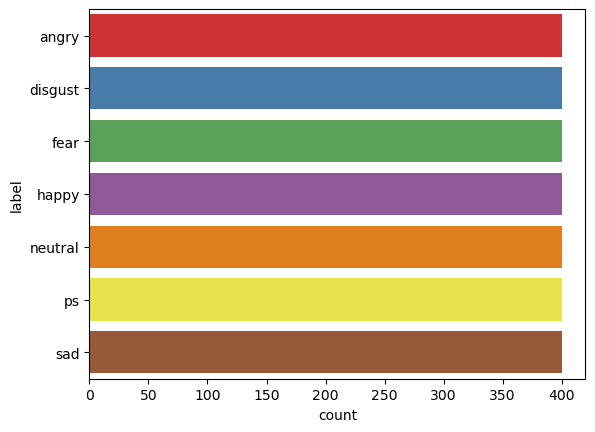

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the 'label' column
sns.countplot(data=df, y='label', palette='Set1')
plt.show()

In [6]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

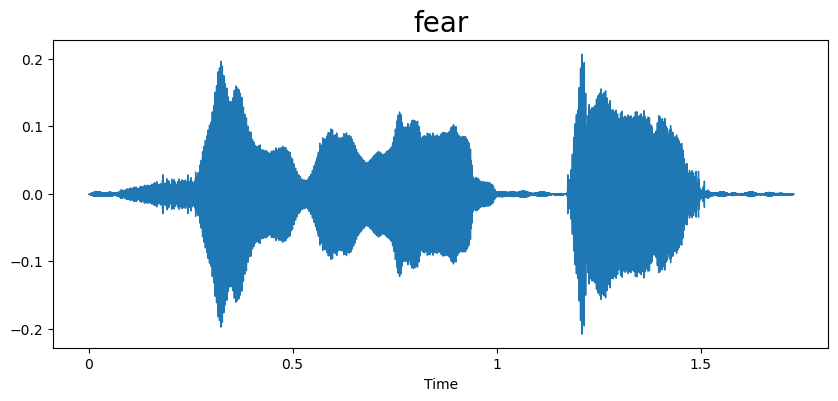

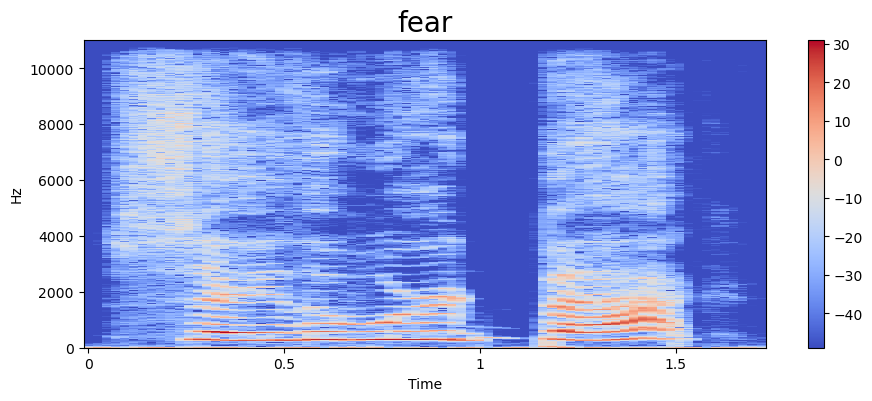

In [7]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

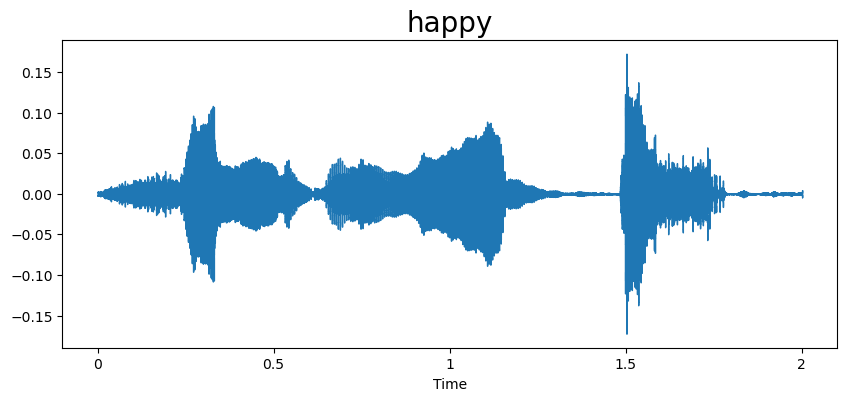

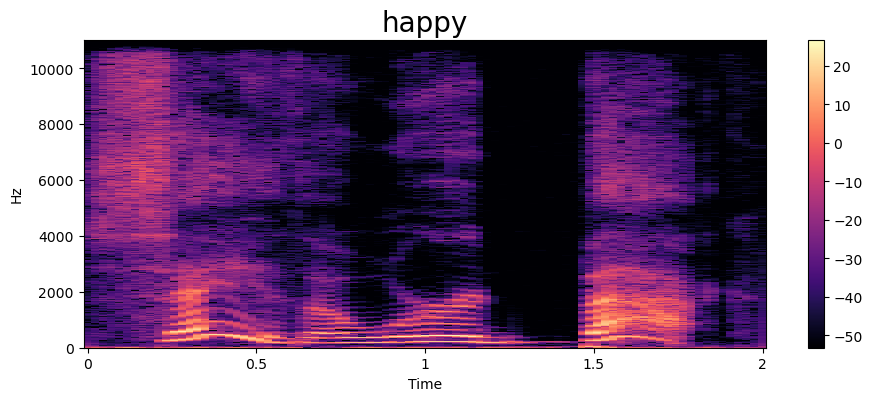

In [8]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


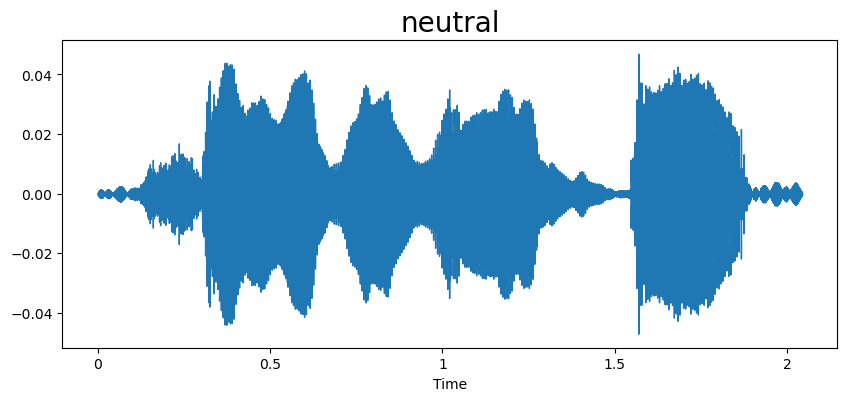

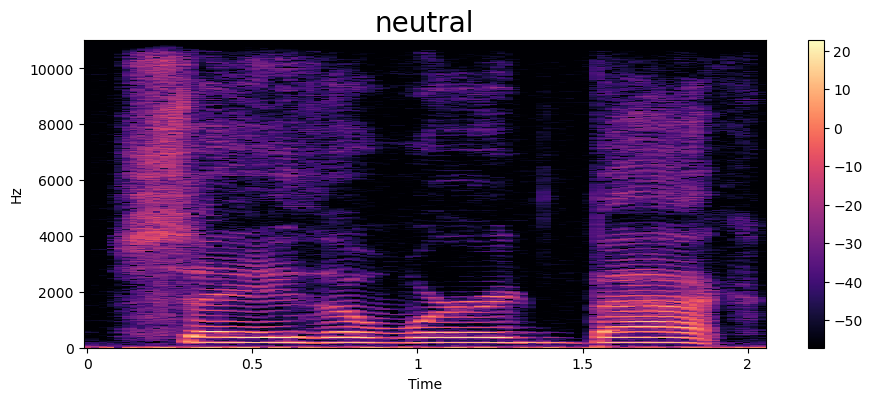

In [9]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

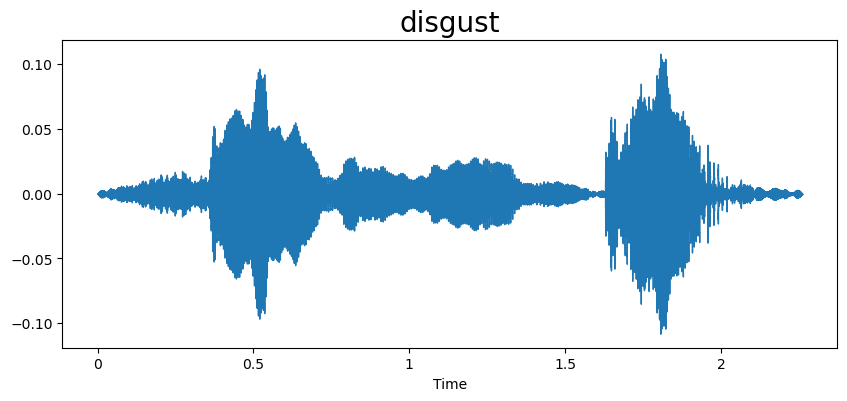

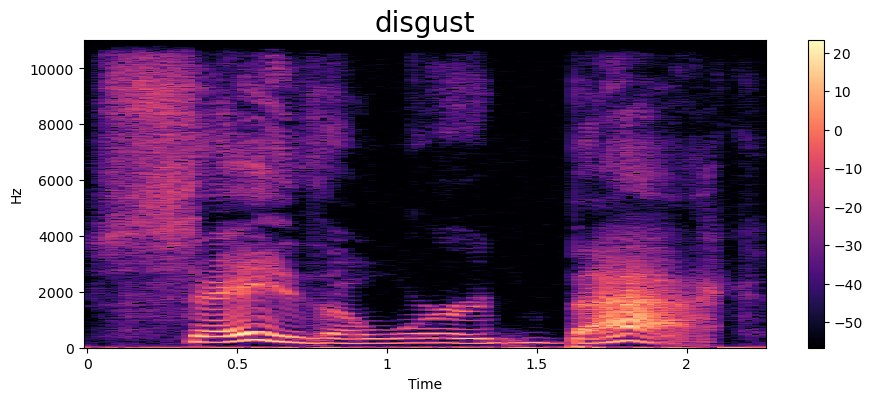

In [10]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

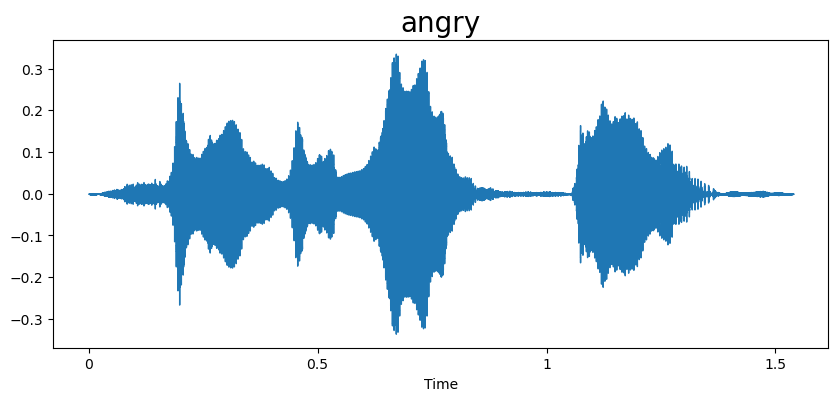

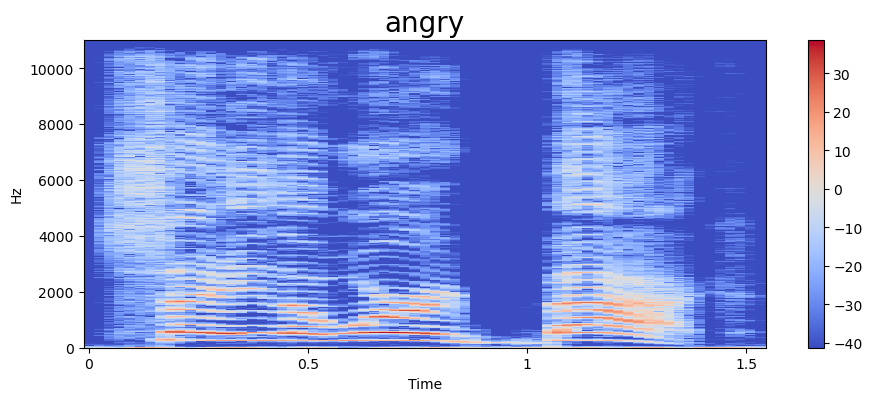

In [11]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [12]:
def extract_features(file_path):
    # Load audio file
    y, sr = librosa.load(file_path, sr=None)
    
    # Extract features
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13), axis=1)
    mel_spectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr), axis=1)
    chroma_stft = np.mean(librosa.feature.chroma_stft(y=y, sr=sr), axis=1)
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr), axis=1)
    
    return np.hstack((mfccs, mel_spectrogram, chroma_stft, spectral_centroid))

In [13]:
df['features'] = df['speech'].apply(extract_features)

# Split the dataset into training and testing sets
X = np.array(df['features'].tolist())
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
clf_mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=100, alpha=0.01, solver='adam', random_state=42)
clf_mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.01, max_iter=100, random_state=42)

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score
y_pred_mlp = clf_mlp.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp, average='weighted')
recall_mlp = recall_score(y_test, y_pred_mlp, average='weighted')
f1_mlp = f1_score(y_test, y_pred_mlp, average='weighted')

print("MLP Classifier Metrics:")
print(f"Precision: {precision_mlp}")
print(f"Recall: {recall_mlp}")
print(f"F1 Score: {f1_mlp}")
print(f"Accuracy: {accuracy}")

MLP Classifier Metrics:
Precision: 0.9616782634106275
Recall: 0.9607142857142857
F1 Score: 0.9605663771907783
Accuracy: 0.9607142857142857


In [16]:
print("The Prediction Made By Model: ")
print("<<<===========================================>>>")
df = pd.DataFrame({'Actual': y_test, 'Predict': y_pred_mlp})
print(df.head(20))

The Prediction Made By Model: 
<<<===========================================>>>
       Actual  Predict
1088       ps       ps
772     happy    happy
2161    happy    happy
1192       ps       ps
1916     fear     fear
1614  disgust  disgust
1399      sad      sad
1461    angry    angry
2222  neutral  neutral
1114       ps       ps
2406       ps       ps
2599       ps       ps
2044    happy       ps
1011       ps  neutral
2108    happy       ps
457      fear     fear
679     happy    happy
2633      sad      sad
321   disgust  disgust
1099       ps       ps


In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
svm_clf = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_clf.fit(X_train_scaled, y_train)

SVC(C=1, random_state=42)

In [19]:
y_pred_svm = svm_clf.predict(X_test_scaled)

In [20]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

print("SVM Classifier Metrics:")
print(f"Precision: {precision_svm}")
print(f"Recall: {recall_svm}")
print(f"F1 Score: {f1_svm}")
print(f"SVM Accuracy: {accuracy_svm}")

SVM Classifier Metrics:
Precision: 0.9965225563909775
Recall: 0.9964285714285714
F1 Score: 0.9964320887445888
SVM Accuracy: 0.9964285714285714


In [21]:
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_clf.fit(X_train_scaled, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [22]:
y_pred_ada = ada_clf.predict(X_test_scaled)

In [23]:
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f"AdaBoost Accuracy: {accuracy_ada}")

# Calculate precision
precision_ada = precision_score(y_test, y_pred_ada, average='weighted')
print(f"AdaBoost Precision: {precision_ada}")

# Calculate recall
recall_ada = recall_score(y_test, y_pred_ada, average='weighted')
print(f"AdaBoost Recall: {recall_ada}")

# Calculate F1 score
f1_ada = f1_score(y_test, y_pred_ada, average='weighted')
print(f"AdaBoost F1 Score: {f1_ada}")

AdaBoost Accuracy: 0.3982142857142857
AdaBoost Precision: 0.45799460396234587
AdaBoost Recall: 0.3982142857142857
AdaBoost F1 Score: 0.31704651711548665
